In [1]:

# first neural network with keras tutorial
import tensorflow as tf
from tensorflow import keras
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
#from keras.wrappers.scikit_learn import KerasRegressor
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from numpy import asarray
from numpy import unique
from numpy import argmax
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from keras.utils.vis_utils import plot_model
from sklearn.preprocessing import StandardScaler

In [2]:
# load the dataset
dataset = loadtxt('Dataset_xdot21.csv', delimiter=',')

In [3]:
# #ESSAI 3  -----OK
X = dataset[:,0:6]
y = dataset[:,6]
scalarX, scalarY = MinMaxScaler(feature_range=(0,1)), MinMaxScaler(feature_range=(0,0.75))
scalarX.fit(X)
scalarY.fit(y.reshape(133,1)) 
X = scalarX.transform(X)
y=np.array(y).reshape(133,1) 
y = scalarY.transform(y) 

In [4]:
print(y)

[[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.  

In [5]:
# define the keras model
model = Sequential()
model.add(Dense(20, input_dim=6, kernel_initializer='normal', activation='relu')) #kernel_initializer='normal'
model.add(Dense(1, kernel_initializer='normal', activation='linear')) #linear
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                140       
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________
None


In [6]:
model.compile(optimizer='adam', loss='mean_absolute_error')

In [7]:
# fit the keras model on the dataset
history = model.fit(X, y, epochs=100, batch_size=8, verbose=2, validation_split=0.25)

Epoch 1/100
13/13 - 1s - loss: 0.0963 - val_loss: 0.7394 - 998ms/epoch - 77ms/step
Epoch 2/100
13/13 - 0s - loss: 0.0954 - val_loss: 0.7439 - 283ms/epoch - 22ms/step
Epoch 3/100
13/13 - 0s - loss: 0.0951 - val_loss: 0.7448 - 322ms/epoch - 25ms/step
Epoch 4/100
13/13 - 0s - loss: 0.0952 - val_loss: 0.7442 - 301ms/epoch - 23ms/step
Epoch 5/100
13/13 - 0s - loss: 0.0948 - val_loss: 0.7432 - 279ms/epoch - 21ms/step
Epoch 6/100
13/13 - 0s - loss: 0.0951 - val_loss: 0.7441 - 254ms/epoch - 20ms/step
Epoch 7/100
13/13 - 0s - loss: 0.0959 - val_loss: 0.7470 - 89ms/epoch - 7ms/step
Epoch 8/100
13/13 - 0s - loss: 0.0959 - val_loss: 0.7392 - 61ms/epoch - 5ms/step
Epoch 9/100
13/13 - 0s - loss: 0.0950 - val_loss: 0.7410 - 86ms/epoch - 7ms/step
Epoch 10/100
13/13 - 0s - loss: 0.0950 - val_loss: 0.7424 - 68ms/epoch - 5ms/step
Epoch 11/100
13/13 - 0s - loss: 0.0949 - val_loss: 0.7394 - 65ms/epoch - 5ms/step
Epoch 12/100
13/13 - 0s - loss: 0.0947 - val_loss: 0.7433 - 67ms/epoch - 5ms/step
Epoch 13/100


In [8]:
# evaluate on test set
yhat = model.predict(X)
error = mean_absolute_error(y, yhat)
print('MAE: %.5f' % error)

MAE: 0.10179


In [9]:
print(yhat) 

[[-1.6311277e-04]
 [-3.8509443e-04]
 [-2.2746064e-04]
 [-3.7078559e-04]
 [-4.0202867e-04]
 [-6.5666623e-04]
 [-8.2238484e-04]
 [-1.0329727e-03]
 [-7.0755556e-04]
 [-4.5812037e-04]
 [-6.9474429e-04]
 [-8.8640023e-04]
 [-5.0356705e-04]
 [ 5.6870561e-04]
 [-6.0560182e-05]
 [-6.1436836e-04]
 [-6.7441911e-04]
 [-7.0513599e-04]
 [-6.2861014e-04]
 [-1.1967886e-03]
 [-1.2906911e-03]
 [-9.5814466e-04]
 [-7.7332463e-04]
 [-9.7306166e-04]
 [-8.9757796e-04]
 [-8.7622087e-04]
 [-5.8237370e-04]
 [-8.0427341e-04]
 [-6.6111423e-04]
 [-9.0050418e-04]
 [-1.1659758e-03]
 [-9.9053141e-04]
 [-8.5426029e-04]
 [-5.9928652e-04]
 [-4.0694606e-04]
 [-1.0054437e-03]
 [-9.3372446e-04]
 [-1.4319988e-03]
 [-1.1496413e-03]
 [-1.1452734e-03]
 [-7.4765738e-04]
 [-1.2208605e-03]
 [-1.3470491e-03]
 [-1.0878816e-03]
 [-1.3900287e-03]
 [-1.6123271e-03]
 [-1.1608843e-03]
 [-1.2463983e-03]
 [-1.2732297e-03]
 [-1.5380075e-03]
 [-1.4374275e-03]
 [-1.2281407e-03]
 [ 9.7188011e-02]
 [-9.5877796e-04]
 [-8.4388349e-04]
 [ 1.32086

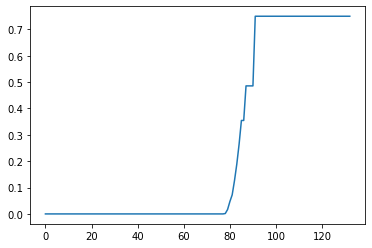

In [10]:
plt.plot(y)

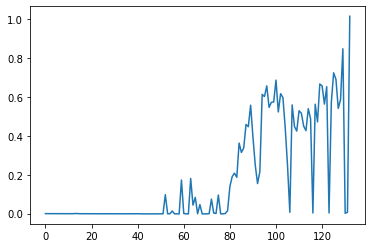

In [11]:
plt.plot(yhat)

In [12]:
print(yhat-y)

[[-1.63112767e-04]
 [-3.85094434e-04]
 [-2.27460638e-04]
 [-3.70785594e-04]
 [-4.02028672e-04]
 [-6.56666234e-04]
 [-8.22384842e-04]
 [-1.03297271e-03]
 [-7.07555562e-04]
 [-4.58120368e-04]
 [-6.94744289e-04]
 [-8.86400230e-04]
 [-5.03567047e-04]
 [ 5.68705611e-04]
 [-6.05601817e-05]
 [-6.14368357e-04]
 [-6.74419105e-04]
 [-7.05135986e-04]
 [-6.28610142e-04]
 [-1.19678862e-03]
 [-1.29069109e-03]
 [-9.58144665e-04]
 [-7.73324631e-04]
 [-9.73061658e-04]
 [-8.97577964e-04]
 [-8.76220874e-04]
 [-5.82373701e-04]
 [-8.04273412e-04]
 [-6.61114231e-04]
 [-9.00504179e-04]
 [-1.16597582e-03]
 [-9.90531407e-04]
 [-8.54260288e-04]
 [-5.99286519e-04]
 [-4.06946056e-04]
 [-1.00544374e-03]
 [-9.33724456e-04]
 [-1.43199880e-03]
 [-1.14964135e-03]
 [-1.14527345e-03]
 [-7.47657381e-04]
 [-1.22086052e-03]
 [-1.34704914e-03]
 [-1.08788162e-03]
 [-1.39002874e-03]
 [-1.61232706e-03]
 [-1.16088428e-03]
 [-1.24639831e-03]
 [-1.27322972e-03]
 [-1.53800752e-03]
 [-1.43742748e-03]
 [-1.22814067e-03]
 [ 9.7188010

In [13]:
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


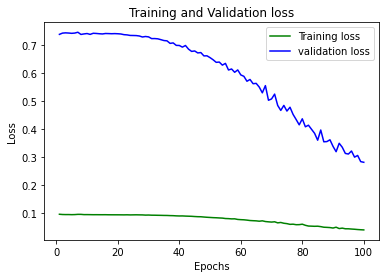

In [14]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()